In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly


Boxes number: 134


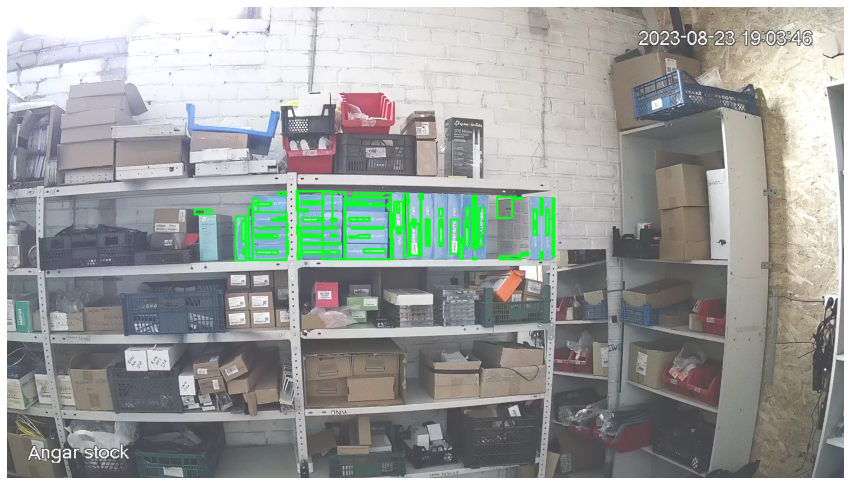

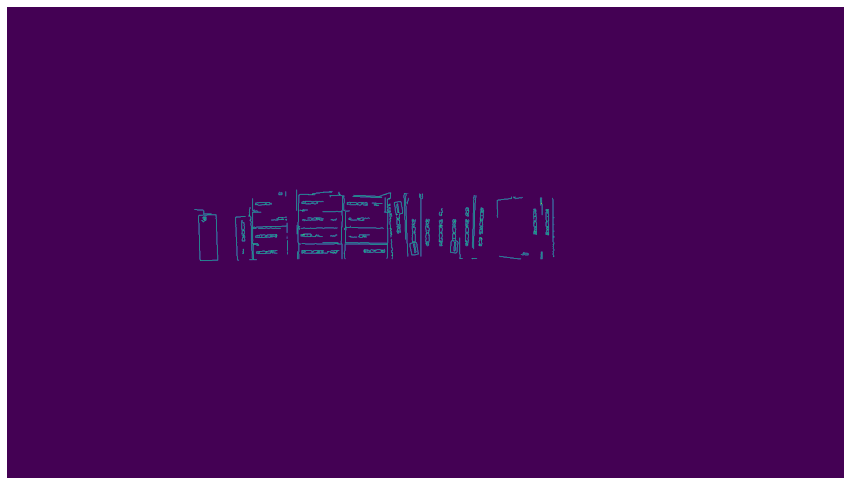

In [2]:
# https://stackoverflow.com/questions/57125879/improve-rectangle-contour-detection-in-image-using-opencv
# Неплохой зезультат по прямоугольникам, но их слишком много
# Here's a simple approach:
# - Convert image to grayscale and Gaussian blur
# - Perform canny edge detection
# - Find contours and draw rectangles

image = cv2.imread('cv_boxes1.png')
mask = cv2.imread('cv_boxes_mask.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

alpha = 1 # Contrast control (1.0-3.0)
beta = 50 # Brightness control (0-100)
image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # COLOR_BGR2GRAY COLOR_BGRA2RGBA https://pyimagesearch.com/2021/04/28/opencv-color-spaces-cv2-cvtcolor/
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
canny = cv2.Canny(blurred, 120, 255, 1) # (blurred, 120, 255, 1)

# plt.figure(figsize=(15,15))
# plt.axis('off')
# plt.imshow(gray)
# plt.show()

# Segment only the detected region
canny = cv2.bitwise_and(canny, canny, mask=mask)

# Find contours
cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterate thorugh contours and draw rectangles around contours
for cnt in cnts:
    if cv2.contourArea(cnt)<2000:
    # if 100<cv2.contourArea(cnt)<500:
    # print(cnt)
    # print(cv2.contourArea(cnt))
    # if (cv2.contourArea(cnt)<2):
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 3)

# cv2.imshow('canny', canny)
# cv2.imshow('image', image)
# cv2.imwrite('canny.png', canny)
# cv2.imwrite('image.png', image)
# cv2.waitKey(0)

print(f"\nBoxes number: {len(cnts)}")

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(image)
plt.show()

plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(canny)
plt.show()
